In [29]:
import urllib.request
import requests,shutil
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import sys,os,glob,re
from pandas import HDFStore
from threading import Thread
from datetime import  datetime,timedelta
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');
import seaborn as sns
import sklearn

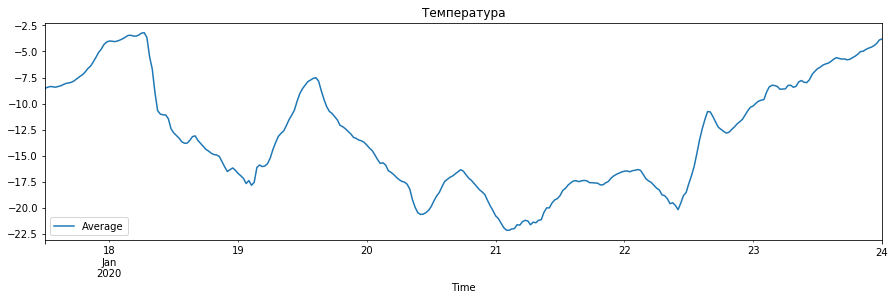

In [79]:
df=pd.read_csv('dataframe.csv')
df["Time"] = pd.to_datetime(df["Time"])
df.dropna(inplace=True)
df.count()#количество значения
u_df = df['Южный компонент'].to_numpy()
v_df = df['Восточный компонент'].to_numpy()
w_df = df['Вертикальный компонент'].to_numpy()
freq = '30min'
res = (df.groupby(pd.Grouper(key="Time", freq=freq,sort=True))['Температура'].mean().reset_index(name='Average'))
res.plot(x='Time', y='Average',title='Температура',figsize=(15,4))



In [102]:
cond1 = (df['Time'].dt.day >= 23) & (df['Time'].dt.day < 31) 
df = df.loc[cond1, ]
df

,Time,Температура,Южный компонент,Восточный компонент,Вертикальный компонент,Атмосферное давление,Влажность воздуха,Признак ошибки,X,Y
1584,2020-01-23 00:00:00,-10.25,-0.07,-1.78,0.64,739.51,85.55,0.0,-1.78,0.64
1585,2020-01-23 00:05:00,-10.28,-0.38,-1.57,0.52,739.52,85.48,0.0,-1.57,0.52
1586,2020-01-23 00:10:00,-10.27,-0.50,-1.50,0.54,739.51,85.65,0.0,-1.50,0.54
1587,2020-01-23 00:15:00,-10.26,-0.44,-1.55,0.74,739.52,85.95,0.0,-1.55,0.74
1588,2020-01-23 00:20:00,-10.20,-0.56,-1.37,0.61,739.53,85.99,0.0,-1.37,0.61
...,...,...,...,...,...,...,...,...,...,...
1868,2020-01-23 23:40:00,-3.91,-4.40,-4.99,2.64,733.69,92.62,0.0,-4.99,2.64
1869,2020-01-23 23:45:00,-3.88,-3.46,-3.28,2.03,733.82,92.24,0.0,-3.28,2.03
1870,2020-01-23 23:50:00,-3.85,-3.89,-3.85,2.24,733.78,91.87,0.0,-3.85,2.24
1871,2020-01-23 23:55:00,-3.82,-4.25,-3.75,2.35,733.73,91.58,0.0,-3.75,2.35


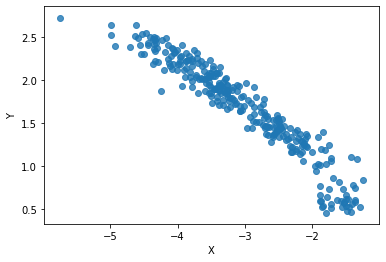

In [260]:

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
df = df.dropna()
df['X'],df['Y'] = df.iloc[:,3] , df.iloc[:,4]

X_train, X_test, y_train, y_test = np.asarray(train_test_split(df['X'], df['Y'], test_size=0.1))
sns.regplot(x='X', y='Y', data=df, fit_reg=False)
plt.show()

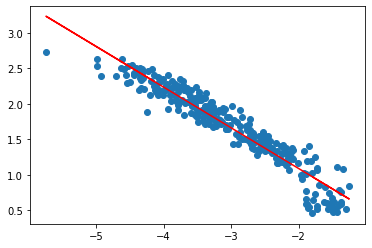

In [261]:
X = df['X'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df['Y'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()


Text(0, 0.5, 'Атмосферное давление')

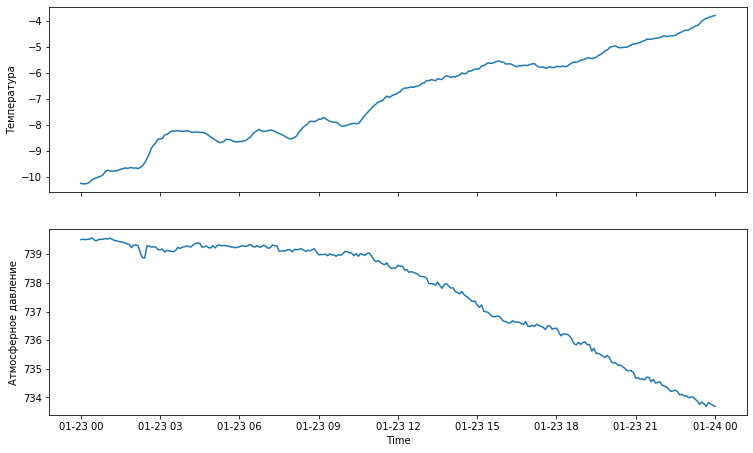

In [178]:

f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
df = df.dropna(subset=['Атмосферное давление'])
axarr[0].plot(df['Time'], df['Температура'])
axarr[0].set_ylabel('Температура')
axarr[1].plot(df['Time'], df['Атмосферное давление'])
axarr[1].set_xlabel('Time')
axarr[1].set_ylabel('Атмосферное давление')


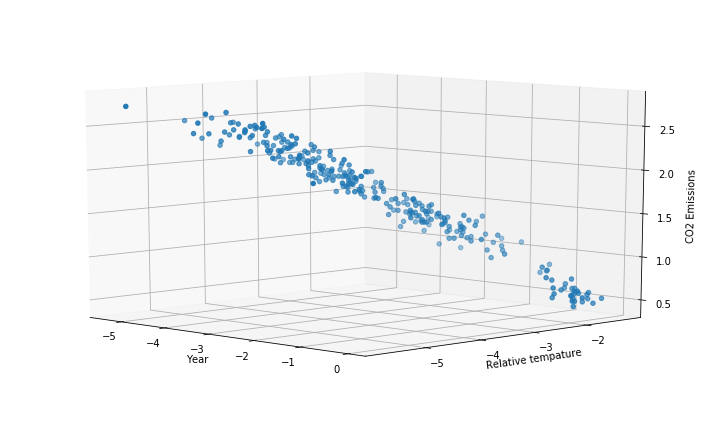

In [184]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=df[x], ys=df[y], zs=df[z])

ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)


In [284]:
X = df[['Южный компонент','Восточный компонент']].values.reshape(-1,2)
Y = df['Вертикальный компонент'].values
x,y,z = 'Южный компонент','Восточный компонент','Вертикальный компонент'
X_train, X_test, y_train, y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

In [285]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [286]:
print('Score: ', reg.score(X_test, y_test))


Score:  0.9545544027527284


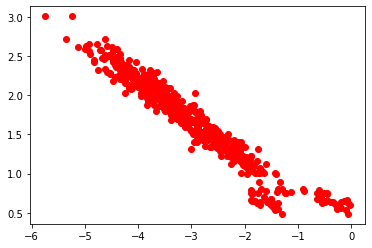

In [282]:
p = reg.predict(X).T
plt.plot(X,p,'ro')


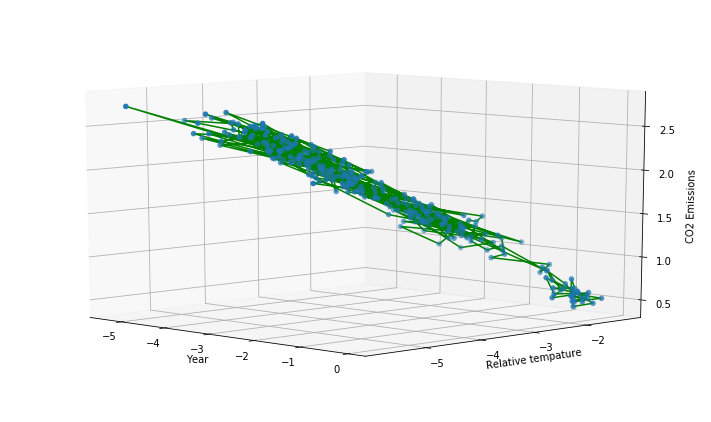

In [259]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=df[x], ys=df[y], zs=df[z])

ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)
ax.plot(xs=X[:,0], ys=X[:,1], zs=Y, color='green')

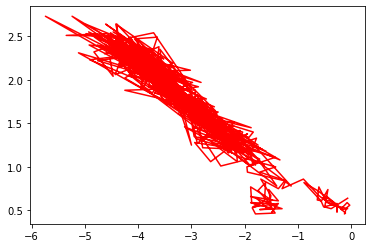

AttributeError: 'Series' object has no attribute 'reshape'

In [280]:
X = df[[x,y]].values.reshape(-1, 2)  # values converts it into a numpy array
Y = df[z].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
# plt.scatter(X, Y)
plt.plot(X, Y, color='red')
plt.show()
print('Score: ', reg.score(X_test.reshape(-1, 1), y_test))
